Matrix Assisted Laser Desorption Ionization Imaging Mass Spectrometry (MALDI IMS) is a promising new technology for visualizing the spatial distribution of analytes viz., proteins, peptides, lipids, drug candidate compounds and biomarkers present in a sampled tissue section. 

**Mass resolution** is sometimes expressed in terms of resolving power, which is defined as $\frac{M}{\Delta M}$ and commonly described in parts per million (ppm) or parts per billion (ppb). A mass spectrum is essentially a histogram spanning the m/z values that were measured. The intensity of a peak at a given m/z value indicates the relative frequency of detected ions with that specific m/z value within the sample. 

- **One peak could indicate several biomolecular ions**, for several reasons:
Isomers are organic compounds with the same molecular formula (= same mass) but different structures, and may have completely different chemical properties. A common example are cis and trans fatty acids.
Distinct molecules may be closer to eachother in mass-to-charge ratio than the mass spectrometer can distinguish, i.e., slightly different m/z values ending up in the same bin. This occurs more frequently in low mass resolution instruments.
- **One molecule shows expression at multiple m/z values** due to adduct formation and isotopical peaks. Isotopes are atom species of the same chemical element that have different masses, caused by a different number of neutrons. Examples include  <sup>1</sup>H and <sup>2</sup>H or <sup>12</sup>C and <sup>13</sup>C. A single molecule with a given elemental formula will therefore give rise to an isotopic distribution, i.e., a set of peaks at different m/z values, the location and intensity distribution of which are determined by its constituent atoms.

**Ion enhancement and ion suppression**
Finally, it is important to be aware of <span style="color:red">_ion enhancement_</span>  and <span style="color:red">_ion suppression_</span>. Recall that the intensity measured for a specific mass-to-charge ratio is a measure for the relative abundance of that m/z value in detected ions. The problem is that not all ions are formed equally in the source of the mass spectrometer. This is caused by the fact that some analytes have higher ionization efficiency in the source, which means that they are more eager to receive a charge compared other molecules. Since the detector only detects ions, analytes with a higher ionization efficiency will have a disproportionately high intensity (enhancement) in the mass spectrum as compared to analytes with lower ionization efficiency which will be suppressed.

As such, due to ion suppression/enhancement, intensities in a mass spectrum do not allow direct assessment of abundance of the different analytes in the sample. In standard MS, various ways exist to significantly reduce the impact of ion suppression/enhancement, but unfortunately most of those measures cannot be used in MSI.

Similar to how a typical camera makes an image with three color channels, namely red, green and blue, where each channel represents the intensity of specific wave length of light, MSI generates images that can have tens of thousands to over a million of different “channels”, where each channel represents the intensity of a specific m/z value (mass over charge).

A standard MSI data set has three key axes, the spatial axes ($x$ and $y$) and the spectral axis ($m/z$)

### About .imzML file:
The imzML file consists of two files: The first file contains the metadata in an XML file and has the extension .imzML. The second file contains the mass spectra data and is saved as binary file and its extension is .ibd. To be valid both files must have the same filename before the extension.

### <span style="color:purple">different scan/pixels in a region has different number of spectra values. </span>
``` matlab
>> length(MSi.MSo.scan(186031).abundance)
ans =
       27343
>> length(MSi.MSo.scan(294030).abundance)
ans =
       29445
>> length(MSi.MSo.scan(294030).mz)
ans =
       29445
```

### ToDo:
- protein imzML/data has issues? No abundance in MSiReader. 
- pattern analysis.
- clustering algorithms, PCA analysis.


In [1]:
# %load_ext autoreload
# %autoreload 2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import sys
# from src.pySRM.pysrm.segment import IMZMLExtract, SpectraRegion, ProteinWeights, CombinedSpectra
# from pIMZ.imzml import IMZMLExtract
from imzml import IMZMLExtract
from comparative import CombinedSpectra
# sys.path()

In [2]:
# dataDir = r'/media/banikr2/banikr/MALDI_protein/'
cardinalDir= r'/media/banikr2/DATA/MALDI/fromCardinal/'
dataDir = r'/media/banikr2/DATA/MALDI/demo_banikr_'
imzPath = glob(os.path.join(dataDir, '*.imzML'))
print(imzPath[0])

/media/banikr2/DATA/MALDI/demo_banikr_/210427-Chen_poslip.imzML


_MSiReader_ says there are 324,513 scans.

`210427-Chen_poslip` has 5 image regions. The image dimensions are: 

In [3]:
imze = IMZMLExtract(imzPath[0])
# imze.dregions[1] # allpixels

/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size". Updating name to "pixel size (x)".
  % (accession, raw_name, name)


Opening regions file for /media/banikr2/DATA/MALDI/demo_banikr_/210427-Chen_poslip.imzML
1 545 628 244 291
2 695 785 244 303
3 704 798 146 212
4 848 940 201 265
5 988 1071 220 273


1 ((545, 628, 244, 291), 3142)
2 ((695, 785, 244, 303), 3975)
3 ((704, 798, 146, 212), 4587)
4 ((848, 940, 201, 265), 4680)
5 ((988, 1071, 220, 273), 3435)


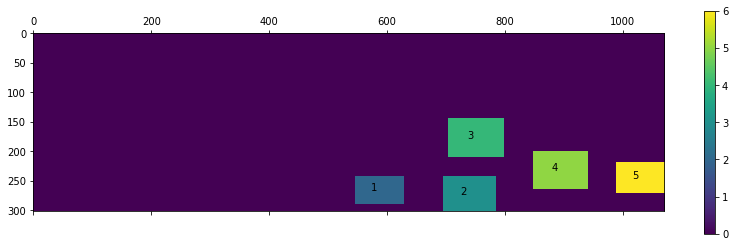

{1: ((545, 628, 244, 291), 3142),
 2: ((695, 785, 244, 303), 3975),
 3: ((704, 798, 146, 212), 4587),
 4: ((848, 940, 201, 265), 4680),
 5: ((988, 1071, 220, 273), 3435)}

In [4]:
imze.list_regions()

Image dimension with number of spectra:<br>
- what is this **#spectra** about?

In [6]:
imze.get_region_indices(1)

{(545, 262, 1): 1182,
 (545, 263, 1): 1266,
 (545, 264, 1): 1350,
 (545, 265, 1): 1434,
 (545, 266, 1): 1518,
 (546, 256, 1): 688,
 (546, 257, 1): 769,
 (546, 258, 1): 851,
 (546, 259, 1): 933,
 (546, 260, 1): 1016,
 (546, 261, 1): 1099,
 (546, 262, 1): 1183,
 (546, 263, 1): 1267,
 (546, 264, 1): 1351,
 (546, 265, 1): 1435,
 (546, 266, 1): 1519,
 (546, 267, 1): 1602,
 (546, 268, 1): 1685,
 (546, 269, 1): 1768,
 (547, 254, 1): 528,
 (547, 255, 1): 608,
 (547, 256, 1): 689,
 (547, 257, 1): 770,
 (547, 258, 1): 852,
 (547, 259, 1): 934,
 (547, 260, 1): 1017,
 (547, 261, 1): 1100,
 (547, 262, 1): 1184,
 (547, 263, 1): 1268,
 (547, 264, 1): 1352,
 (547, 265, 1): 1436,
 (547, 266, 1): 1520,
 (547, 267, 1): 1603,
 (547, 268, 1): 1686,
 (547, 269, 1): 1769,
 (547, 270, 1): 1850,
 (547, 271, 1): 1931,
 (548, 252, 1): 372,
 (548, 253, 1): 450,
 (548, 254, 1): 529,
 (548, 255, 1): 609,
 (548, 256, 1): 690,
 (548, 257, 1): 771,
 (548, 258, 1): 853,
 (548, 259, 1): 935,
 (548, 260, 1): 1018,
 (548,

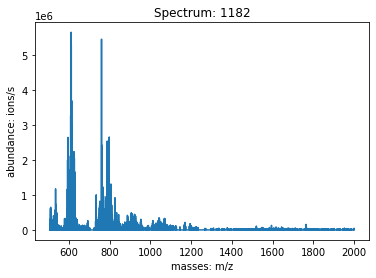

In [11]:
plt.plot(imze.parser.getspectrum(1182)[0], imze.parser.getspectrum(1182)[1])
plt.title("Spectrum: 1182")
plt.xlabel("masses: m/z")
plt.ylabel("abundance: ions/s")
plt.show()

In [18]:
(imze.parser.getspectrum(1310)[0] == imze.parser.getspectrum(1000)[0])#.all
# (imze.parser.getspectrum(1310)[0] == im

/home/banikr2/miniconda3/envs/ims37/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [23]:
# len(imze.dregions)
# np.shape(imze.dregions[1]) # (3142, 3)
# imze.logger.info
print(imze.get_region_range(2))
# reg1_mask = np.zeros([84,48])
count = 0
for coord in imze.dregions[1]:
    count += 1
#     print(count, coord)
#     reg1_mask[coord[0],coord[1]]=1
# imze.get_region_shape(1)

((695, 785), (244, 303), (1, 1), 1332)


In [12]:
region1shape = imze.get_region_shape(1)
region1 = imze.get_region_array(1)
print(region1)

Fetching region range
Fetching region shape
Found region 1 with shape (84, 48, 1332)
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:00
|##############################################################################################################################################################################################| 100% Time: 0:00:00


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [25]:
imze.mzValues

array([ 510.18976,  510.21732,  510.22955, ..., 1616.0978 , 1617.1066 ,
       1763.5247 ], dtype=float32)

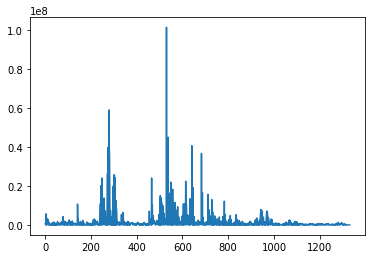

In [28]:
plt.plot(region1[24, 36, :])

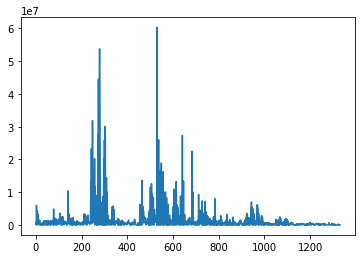

In [31]:
plt.plot(region1[25,37,:])

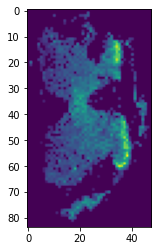

In [37]:
plt.imshow(region1[:,:,650])

In [284]:
regionid = 1
count = 0
outspectra = {}
for coord in imze.dregions[regionid]:
    spectID = imze.coord2index.get(coord)
    count +=1
    cspec = imze.get_spectrum(spectID)
#     print(count, coord, spectID, len(cspec))
    cspec = cspec[imze.specStart:]# / 1.0
    outspectra[coord] = cspec
    break

In [285]:
spectID, coord

(1182, (545, 262, 1))

In [273]:
# imze.parser.coordinates
imze.parser.mzLengths[1434]


30003

In [279]:
imze.mzValues[0]

506.8382263183594

In [294]:
region1[42,20,:].shape

(36755,)

In [282]:
spectrum = region1[24, 40, :]
print(spectrum[23])

14161.819


## How to convert total coordinates to region coordinate and specID
- what is specID? How/where does it come from? Is it from coordinates? <br>
for `chen_pos_lip` there are #19819 pixels/scans with spectrum. This is the highest specID possible. This is coded by `pyimzml.ImzMLParser.getspectrum`.  <br>
<br>
- The z or 3rd dimension in all region values are always 1. For example, here are indices/specIDs for region 2 and there total coordinate values: 
``` python
imze.get_region_indices(2)
{ 
  (697, 270, 1): 17596,
  (697, 271, 1): 17683,
  (697, 272, 1): 17771,...}

```

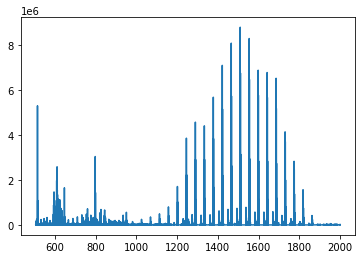

In [5]:
plt.plot(imze.parser.getspectrum(22)[0], imze.parser.getspectrum(22)[1])
plt.show()

In [415]:
len(imze.parser.getspectrum(10)[0]), \
len(imze.parser.getspectrum(12)[0])

(36755, 31769)

In [409]:
masses = imze.parser.getspectrum(10)[0]
print(min(masses), max(masses))
massesNew = [x for x in np.arange(min(masses), max(masses), 0.1)]
print(np.shape(massesNew))

506.8382263183594 1999.982666015625
(14932,)


(558, 245, 1) 	 12

In [5]:
len(imze.get_region_indices(1))
regInd = imze.get_region_indices(1)

for coord in regInd:
    print(coord, '\t', imze.coord2index.get(coord))
    masses = imze.parser.getspectrum(imze.coord2index.get(coord))[0]
#     print(masses)
#     print(np.shape(masses))
print(len(regInd))

(545, 262, 1) 	 1182
(545, 263, 1) 	 1266
(545, 264, 1) 	 1350
(545, 265, 1) 	 1434
(545, 266, 1) 	 1518
(546, 256, 1) 	 688
(546, 257, 1) 	 769
(546, 258, 1) 	 851
(546, 259, 1) 	 933
(546, 260, 1) 	 1016
(546, 261, 1) 	 1099
(546, 262, 1) 	 1183
(546, 263, 1) 	 1267
(546, 264, 1) 	 1351
(546, 265, 1) 	 1435
(546, 266, 1) 	 1519
(546, 267, 1) 	 1602
(546, 268, 1) 	 1685
(546, 269, 1) 	 1768
(547, 254, 1) 	 528
(547, 255, 1) 	 608
(547, 256, 1) 	 689
(547, 257, 1) 	 770
(547, 258, 1) 	 852
(547, 259, 1) 	 934
(547, 260, 1) 	 1017
(547, 261, 1) 	 1100
(547, 262, 1) 	 1184
(547, 263, 1) 	 1268
(547, 264, 1) 	 1352
(547, 265, 1) 	 1436
(547, 266, 1) 	 1520
(547, 267, 1) 	 1603
(547, 268, 1) 	 1686
(547, 269, 1) 	 1769
(547, 270, 1) 	 1850
(547, 271, 1) 	 1931
(548, 252, 1) 	 372
(548, 253, 1) 	 450
(548, 254, 1) 	 529
(548, 255, 1) 	 609
(548, 256, 1) 	 690
(548, 257, 1) 	 771
(548, 258, 1) 	 853
(548, 259, 1) 	 935
(548, 260, 1) 	 1018
(548, 261, 1) 	 1101
(548, 262, 1) 	 1185
(548, 263,

(560, 257, 1) 	 783
(560, 258, 1) 	 865
(560, 259, 1) 	 947
(560, 260, 1) 	 1030
(560, 261, 1) 	 1113
(560, 262, 1) 	 1197
(560, 263, 1) 	 1281
(560, 264, 1) 	 1365
(560, 265, 1) 	 1449
(560, 266, 1) 	 1533
(560, 267, 1) 	 1616
(560, 268, 1) 	 1699
(560, 269, 1) 	 1782
(560, 270, 1) 	 1863
(560, 271, 1) 	 1944
(560, 272, 1) 	 2023
(560, 273, 1) 	 2099
(560, 274, 1) 	 2172
(560, 275, 1) 	 2243
(560, 276, 1) 	 2312
(560, 277, 1) 	 2381
(560, 278, 1) 	 2449
(560, 279, 1) 	 2516
(560, 280, 1) 	 2582
(560, 281, 1) 	 2645
(560, 282, 1) 	 2707
(560, 283, 1) 	 2768
(560, 284, 1) 	 2827
(560, 285, 1) 	 2883
(561, 244, 1) 	 0
(561, 245, 1) 	 15
(561, 246, 1) 	 35
(561, 247, 1) 	 60
(561, 248, 1) 	 103
(561, 249, 1) 	 165
(561, 250, 1) 	 235
(561, 251, 1) 	 308
(561, 252, 1) 	 385
(561, 253, 1) 	 463
(561, 254, 1) 	 542
(561, 255, 1) 	 622
(561, 256, 1) 	 703
(561, 257, 1) 	 784
(561, 258, 1) 	 866
(561, 259, 1) 	 948
(561, 260, 1) 	 1031
(561, 261, 1) 	 1114
(561, 262, 1) 	 1198
(561, 263, 1) 	 

(569, 269, 1) 	 1791
(569, 270, 1) 	 1872
(569, 271, 1) 	 1953
(569, 272, 1) 	 2032
(569, 273, 1) 	 2108
(569, 274, 1) 	 2181
(569, 275, 1) 	 2252
(569, 276, 1) 	 2321
(569, 277, 1) 	 2390
(569, 278, 1) 	 2458
(569, 279, 1) 	 2525
(569, 280, 1) 	 2591
(569, 281, 1) 	 2654
(569, 282, 1) 	 2716
(569, 283, 1) 	 2777
(569, 284, 1) 	 2836
(569, 285, 1) 	 2892
(569, 286, 1) 	 2943
(569, 287, 1) 	 2989
(569, 288, 1) 	 3030
(570, 244, 1) 	 9
(570, 245, 1) 	 24
(570, 246, 1) 	 44
(570, 247, 1) 	 69
(570, 248, 1) 	 112
(570, 249, 1) 	 174
(570, 250, 1) 	 244
(570, 251, 1) 	 317
(570, 252, 1) 	 394
(570, 253, 1) 	 472
(570, 254, 1) 	 551
(570, 255, 1) 	 631
(570, 256, 1) 	 712
(570, 257, 1) 	 793
(570, 258, 1) 	 875
(570, 259, 1) 	 957
(570, 260, 1) 	 1040
(570, 261, 1) 	 1123
(570, 262, 1) 	 1207
(570, 263, 1) 	 1291
(570, 264, 1) 	 1375
(570, 265, 1) 	 1459
(570, 266, 1) 	 1543
(570, 267, 1) 	 1626
(570, 268, 1) 	 1709
(570, 269, 1) 	 1792
(570, 270, 1) 	 1873
(570, 271, 1) 	 1954
(570, 272, 1)

(578, 274, 1) 	 2190
(578, 275, 1) 	 2261
(578, 276, 1) 	 2330
(578, 277, 1) 	 2399
(578, 278, 1) 	 2467
(578, 279, 1) 	 2534
(578, 280, 1) 	 2600
(578, 281, 1) 	 2663
(578, 282, 1) 	 2725
(578, 283, 1) 	 2786
(578, 284, 1) 	 2845
(578, 285, 1) 	 2901
(578, 286, 1) 	 2952
(578, 287, 1) 	 2998
(578, 288, 1) 	 3039
(578, 289, 1) 	 3075
(578, 290, 1) 	 3103
(579, 247, 1) 	 78
(579, 248, 1) 	 121
(579, 249, 1) 	 183
(579, 250, 1) 	 253
(579, 251, 1) 	 326
(579, 252, 1) 	 403
(579, 253, 1) 	 481
(579, 254, 1) 	 560
(579, 255, 1) 	 640
(579, 256, 1) 	 721
(579, 257, 1) 	 802
(579, 258, 1) 	 884
(579, 259, 1) 	 966
(579, 260, 1) 	 1049
(579, 261, 1) 	 1132
(579, 262, 1) 	 1216
(579, 263, 1) 	 1300
(579, 264, 1) 	 1384
(579, 265, 1) 	 1468
(579, 266, 1) 	 1552
(579, 267, 1) 	 1635
(579, 268, 1) 	 1718
(579, 269, 1) 	 1801
(579, 270, 1) 	 1882
(579, 271, 1) 	 1963
(579, 272, 1) 	 2042
(579, 273, 1) 	 2118
(579, 274, 1) 	 2191
(579, 275, 1) 	 2262
(579, 276, 1) 	 2331
(579, 277, 1) 	 2400
(579, 

(588, 250, 1) 	 262
(588, 251, 1) 	 335
(588, 252, 1) 	 412
(588, 253, 1) 	 490
(588, 254, 1) 	 569
(588, 255, 1) 	 649
(588, 256, 1) 	 730
(588, 257, 1) 	 811
(588, 258, 1) 	 893
(588, 259, 1) 	 975
(588, 260, 1) 	 1058
(588, 261, 1) 	 1141
(588, 262, 1) 	 1225
(588, 263, 1) 	 1309
(588, 264, 1) 	 1393
(588, 265, 1) 	 1477
(588, 266, 1) 	 1561
(588, 267, 1) 	 1644
(588, 268, 1) 	 1727
(588, 269, 1) 	 1810
(588, 270, 1) 	 1891
(588, 271, 1) 	 1972
(588, 272, 1) 	 2051
(588, 273, 1) 	 2127
(588, 274, 1) 	 2200
(588, 275, 1) 	 2271
(588, 276, 1) 	 2340
(588, 277, 1) 	 2409
(588, 278, 1) 	 2477
(588, 279, 1) 	 2544
(588, 280, 1) 	 2610
(588, 281, 1) 	 2673
(588, 282, 1) 	 2735
(588, 283, 1) 	 2796
(588, 284, 1) 	 2855
(588, 285, 1) 	 2911
(588, 286, 1) 	 2962
(588, 287, 1) 	 3008
(588, 288, 1) 	 3049
(588, 289, 1) 	 3085
(588, 290, 1) 	 3113
(588, 291, 1) 	 3131
(589, 249, 1) 	 193
(589, 250, 1) 	 263
(589, 251, 1) 	 336
(589, 252, 1) 	 413
(589, 253, 1) 	 491
(589, 254, 1) 	 570
(589, 25

(597, 271, 1) 	 1981
(597, 272, 1) 	 2060
(597, 273, 1) 	 2136
(597, 274, 1) 	 2209
(597, 275, 1) 	 2280
(597, 276, 1) 	 2349
(597, 277, 1) 	 2418
(597, 278, 1) 	 2486
(597, 279, 1) 	 2553
(597, 280, 1) 	 2619
(597, 281, 1) 	 2682
(597, 282, 1) 	 2744
(597, 283, 1) 	 2805
(597, 284, 1) 	 2864
(597, 285, 1) 	 2920
(597, 286, 1) 	 2971
(597, 287, 1) 	 3017
(597, 288, 1) 	 3058
(597, 289, 1) 	 3094
(597, 290, 1) 	 3122
(597, 291, 1) 	 3140
(598, 247, 1) 	 82
(598, 248, 1) 	 137
(598, 249, 1) 	 202
(598, 250, 1) 	 272
(598, 251, 1) 	 345
(598, 252, 1) 	 422
(598, 253, 1) 	 500
(598, 254, 1) 	 579
(598, 255, 1) 	 659
(598, 256, 1) 	 740
(598, 257, 1) 	 821
(598, 258, 1) 	 903
(598, 259, 1) 	 985
(598, 260, 1) 	 1068
(598, 261, 1) 	 1151
(598, 262, 1) 	 1235
(598, 263, 1) 	 1319
(598, 264, 1) 	 1403
(598, 265, 1) 	 1487
(598, 266, 1) 	 1571
(598, 267, 1) 	 1654
(598, 268, 1) 	 1737
(598, 269, 1) 	 1820
(598, 270, 1) 	 1901
(598, 271, 1) 	 1982
(598, 272, 1) 	 2061
(598, 273, 1) 	 2137
(598, 

(607, 249, 1) 	 211
(607, 250, 1) 	 281
(607, 251, 1) 	 354
(607, 252, 1) 	 431
(607, 253, 1) 	 509
(607, 254, 1) 	 588
(607, 255, 1) 	 668
(607, 256, 1) 	 749
(607, 257, 1) 	 830
(607, 258, 1) 	 912
(607, 259, 1) 	 994
(607, 260, 1) 	 1077
(607, 261, 1) 	 1160
(607, 262, 1) 	 1244
(607, 263, 1) 	 1328
(607, 264, 1) 	 1412
(607, 265, 1) 	 1496
(607, 266, 1) 	 1580
(607, 267, 1) 	 1663
(607, 268, 1) 	 1746
(607, 269, 1) 	 1829
(607, 270, 1) 	 1910
(607, 271, 1) 	 1991
(607, 272, 1) 	 2070
(607, 273, 1) 	 2146
(607, 274, 1) 	 2219
(607, 275, 1) 	 2290
(607, 276, 1) 	 2359
(607, 277, 1) 	 2428
(607, 278, 1) 	 2496
(607, 279, 1) 	 2563
(607, 280, 1) 	 2629
(607, 281, 1) 	 2692
(607, 282, 1) 	 2754
(607, 283, 1) 	 2815
(607, 284, 1) 	 2874
(607, 285, 1) 	 2930
(607, 286, 1) 	 2981
(607, 287, 1) 	 3027
(607, 288, 1) 	 3068
(608, 247, 1) 	 92
(608, 248, 1) 	 147
(608, 249, 1) 	 212
(608, 250, 1) 	 282
(608, 251, 1) 	 355
(608, 252, 1) 	 432
(608, 253, 1) 	 510
(608, 254, 1) 	 589
(608, 255, 1

(618, 251, 1) 	 365
(618, 252, 1) 	 442
(618, 253, 1) 	 520
(618, 254, 1) 	 599
(618, 255, 1) 	 679
(618, 256, 1) 	 760
(618, 257, 1) 	 841
(618, 258, 1) 	 923
(618, 259, 1) 	 1005
(618, 260, 1) 	 1088
(618, 261, 1) 	 1171
(618, 262, 1) 	 1255
(618, 263, 1) 	 1339
(618, 264, 1) 	 1423
(618, 265, 1) 	 1507
(618, 266, 1) 	 1591
(618, 267, 1) 	 1674
(618, 268, 1) 	 1757
(618, 269, 1) 	 1840
(618, 270, 1) 	 1921
(618, 271, 1) 	 2002
(618, 272, 1) 	 2081
(618, 273, 1) 	 2157
(618, 274, 1) 	 2230
(618, 275, 1) 	 2301
(618, 276, 1) 	 2370
(618, 277, 1) 	 2439
(618, 278, 1) 	 2507
(618, 279, 1) 	 2574
(618, 280, 1) 	 2640
(619, 250, 1) 	 293
(619, 251, 1) 	 366
(619, 252, 1) 	 443
(619, 253, 1) 	 521
(619, 254, 1) 	 600
(619, 255, 1) 	 680
(619, 256, 1) 	 761
(619, 257, 1) 	 842
(619, 258, 1) 	 924
(619, 259, 1) 	 1006
(619, 260, 1) 	 1089
(619, 261, 1) 	 1172
(619, 262, 1) 	 1256
(619, 263, 1) 	 1340
(619, 264, 1) 	 1424
(619, 265, 1) 	 1508
(619, 266, 1) 	 1592
(619, 267, 1) 	 1675
(619, 268

In [198]:
sdfsf = []
sdfsf.append(coord)
sdfsf.append(coord)
print(sdfsf)

[(628, 268, 1), (628, 268, 1)]


In [194]:
n_bins = 1495
binned_mat = np.zeros([len(regInd), n_bins])
print(binned_mat.shape)

(3142, 1495)


In [6]:
plt.plot(spectrum[0],spectrum[1])
plt.show()
# print(type(spectrum))

NameError: name 'spectrum' is not defined

In [9]:
class Binning(object):
    """
    given the imze object should create 3D matrix(spatial based) or 2D(spectrum based)
    spectrum: array with 2 vectors, one of abundance(1), other with m/z values(0)
    n_bins: number of bins/samples to be digitized
    plotspec: to plot the new binned spectrum, default--> True
    """
    def __init__(self, imzObj, regionID, n_bins, plotspec=False):
        self.imzObj = imzObj
        self.regionID = regionID
        self.n_bins = n_bins
        self.plotspec = plotspec
    
        xr, yr, zr, _ = self.imzObj.get_region_range(regionID)
        self.imzeShape = [xr[1]-xr[0]+1,
                 yr[1]-yr[0]+1, self.n_bins -1]

    def getBinMat(self):
        sarray = np.zeros(self.imzeShape, dtype=np.float32)
        regInd = self.imzObj.get_region_indices(self.regionID)
        binned_mat = np.zeros([len(regInd), self.n_bins - 1])
        coordList = []
        for i, coord in enumerate(regInd):
            spectrum = self.imzObj.parser.getspectrum(self.imzObj.coord2index.get(coord)) #[0]
            bSpec = self.onebinning(spectrum)
            binned_mat[i] = bSpec
            xpos = coord[0]-xr[0]
            ypos = coord[1]-yr[0]
            sarray[xpos, ypos, :] = bSpec
            coordList.append(coord)
        return sarray, binned_mat, coordList

    def onebinning(self, spectrum):
        """
        returns: binned_spectrum
        """
        bins = np.linspace(spectrum[0][0], spectrum[0][-1], num=self.n_bins, endpoint=True)
        hist = np.histogram(spectrum[0], bins=bins)
        binned_spectrum = np.zeros_like(hist[0])
        hstart = 0
        for i in range(len(hist[0])):
            binned_spectrum[i] = np.sum(spectrum[1][hstart:hstart + hist[0][i]])
            hstart = hstart + hist[0][i]
        if self.plotspec:
            plt.plot(bins[1:], binned_spectrum)
            plt.show()
        return binned_spectrum

In [8]:
xr, yr, zr, _ = imze.get_region_range(1)
n_bins = 1495
imzeShape = [xr[1]-xr[0]+1,
             yr[1]-yr[0]+1, n_bins]
sarray = np.zeros(imzeShape, dtype=np.float32)
print(sarray.shape, sarray.dtype)
# coord2spec = imze.get_region_spectra(1)
# for coord in coord2spec:
#     print(coord)
# #     spec = coord2spec[coord]
#     break

# regInd = imze.get_region_indices(1)
# for i, coord in enumerate(regInd):
#     xpos = coord[0]-xr[0]
#     ypos = coord[1]-yr[0]
#     sarray[xpos, ypos, :] = spectra
#     print(coord)
#     break
# print(spec.shape)

(84, 48, 1495) float32


In [75]:
# coordL[23]
A = Binning(imzObj=imze, regionID=1, n_bins=1495)
hyImg, mat, coordL = A.getBinMat()
print(hyImg.shape, mat.shape)

(84, 48, 1494) (3142, 1494)


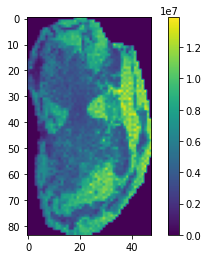

In [150]:
plt.imshow(hyImg[...,100])
plt.colorbar()
plt.show()

In [153]:
mat.shape

(3142, 1494)

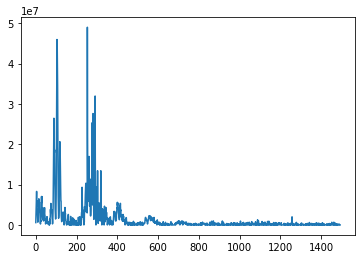

In [155]:
plt.plot(mat[12,:])

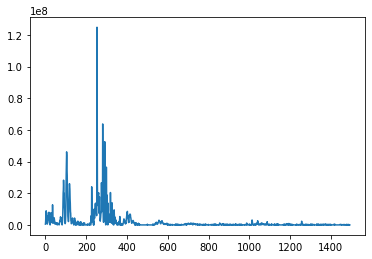

In [157]:
plt.plot(mat[300,:])

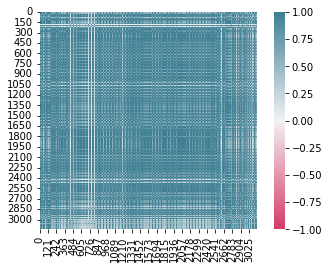

In [154]:
import pandas as pd
import seaborn as sns
data = pd.DataFrame(mat.T)
corr = data.corr()
ax = sns.heatmap(corr,               #mat,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(0, 220, n=200),
        square=True)

In [164]:
corr

,0,1,2,3,4,5,6,7,8,9,...,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141
0,1.000000,0.980510,0.967423,0.967219,0.975345,0.971606,0.966640,0.977301,0.971834,0.971106,...,0.940756,0.905460,0.896213,0.944740,0.926198,0.942486,0.951174,0.938020,0.956938,0.952001
1,0.980510,1.000000,0.989400,0.992111,0.995752,0.960797,0.986830,0.992038,0.990759,0.988693,...,0.954279,0.919985,0.913101,0.971808,0.950054,0.970583,0.975761,0.965763,0.981803,0.979592
2,0.967423,0.989400,1.000000,0.995135,0.992600,0.959958,0.995692,0.994750,0.995785,0.993719,...,0.972174,0.936784,0.928793,0.982595,0.969033,0.984802,0.987031,0.982890,0.990279,0.988680
3,0.967219,0.992111,0.995135,1.000000,0.995269,0.951498,0.992284,0.993312,0.993990,0.992438,...,0.966373,0.933913,0.924354,0.982648,0.965299,0.982323,0.986030,0.981612,0.990026,0.988524
4,0.975345,0.995752,0.992600,0.995269,1.000000,0.961240,0.988846,0.994174,0.992259,0.989089,...,0.960884,0.923317,0.914912,0.974479,0.956252,0.976097,0.981641,0.974201,0.986458,0.983534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.942486,0.970583,0.984802,0.982323,0.976097,0.937056,0.983719,0.978780,0.980788,0.982947,...,0.983377,0.956771,0.948170,0.992670,0.988382,1.000000,0.993202,0.992632,0.992869,0.993816
3138,0.951174,0.975761,0.987031,0.986030,0.981641,0.946554,0.984996,0.982610,0.982854,0.984493,...,0.981067,0.951121,0.940022,0.992502,0.983404,0.993202,1.000000,0.993385,0.995536,0.995956
3139,0.938020,0.965763,0.982890,0.981612,0.974201,0.932768,0.981620,0.976469,0.977622,0.978373,...,0.981741,0.953163,0.941009,0.990553,0.985550,0.992632,0.993385,1.000000,0.993114,0.992425
3140,0.956938,0.981803,0.990279,0.990026,0.986458,0.949426,0.987797,0.986051,0.986920,0.986855,...,0.978800,0.949439,0.939428,0.991585,0.981115,0.992869,0.995536,0.993114,1.000000,0.995843


In [183]:
np.array(np.where(corr[3141]>0.8)).shape

(1, 962)

In [186]:
corr[:][0]

0       1.000000
1       0.980510
2       0.967423
3       0.967219
4       0.975345
          ...   
3137    0.942486
3138    0.951174
3139    0.938020
3140    0.956938
3141    0.952001
Name: 0, Length: 3142, dtype: float64

In [163]:
coordL

[(545, 262, 1),
 (545, 263, 1),
 (545, 264, 1),
 (545, 265, 1),
 (545, 266, 1),
 (546, 256, 1),
 (546, 257, 1),
 (546, 258, 1),
 (546, 259, 1),
 (546, 260, 1),
 (546, 261, 1),
 (546, 262, 1),
 (546, 263, 1),
 (546, 264, 1),
 (546, 265, 1),
 (546, 266, 1),
 (546, 267, 1),
 (546, 268, 1),
 (546, 269, 1),
 (547, 254, 1),
 (547, 255, 1),
 (547, 256, 1),
 (547, 257, 1),
 (547, 258, 1),
 (547, 259, 1),
 (547, 260, 1),
 (547, 261, 1),
 (547, 262, 1),
 (547, 263, 1),
 (547, 264, 1),
 (547, 265, 1),
 (547, 266, 1),
 (547, 267, 1),
 (547, 268, 1),
 (547, 269, 1),
 (547, 270, 1),
 (547, 271, 1),
 (548, 252, 1),
 (548, 253, 1),
 (548, 254, 1),
 (548, 255, 1),
 (548, 256, 1),
 (548, 257, 1),
 (548, 258, 1),
 (548, 259, 1),
 (548, 260, 1),
 (548, 261, 1),
 (548, 262, 1),
 (548, 263, 1),
 (548, 264, 1),
 (548, 265, 1),
 (548, 266, 1),
 (548, 267, 1),
 (548, 268, 1),
 (548, 269, 1),
 (548, 270, 1),
 (548, 271, 1),
 (549, 250, 1),
 (549, 251, 1),
 (549, 252, 1),
 (549, 253, 1),
 (549, 254, 1),
 (549, 2

In [158]:
84*48

4032

In [ ]:
plt.plot(hyImg[])

### PCA

In [257]:
print(mat.max(), mat.min(), mat.mean(), mat.std())
mat_std = (mat - mat.mean()) / mat.std()

667996193.0 0.0 1852983.5095320812 8480132.218797915


In [258]:
print(mat_std.max(), mat_std.min(), mat_std.mean(), mat_std.std())

78.55339896868917 -0.21850879935864342 1.6328041831327434e-17 0.9999999999999997


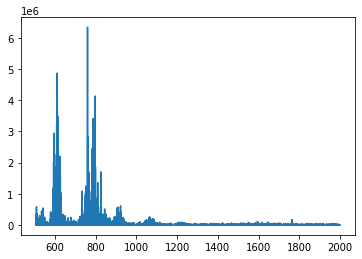

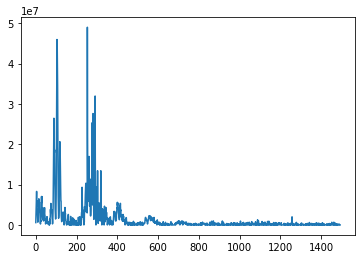

In [187]:
spectrum = imze.parser.getspectrum(imze.coord2index.get(coordL[12]))
plt.plot(spectrum[0][:], spectrum[1][:])
plt.show()
plt.plot(mat[12,:])
plt.show()

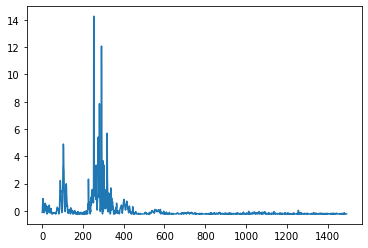

In [262]:
plt.plot(mat_std[230,:])
plt.show()

(3142, 2)


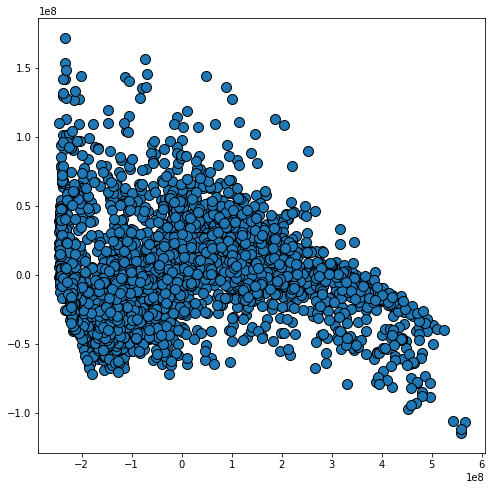

In [273]:
# coordL
from sklearn.decomposition import PCA
import mglearn
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(mat)
x_pca = pca.transform(mat)
print(x_pca.shape)
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1])
plt.show()

(3142, 100)


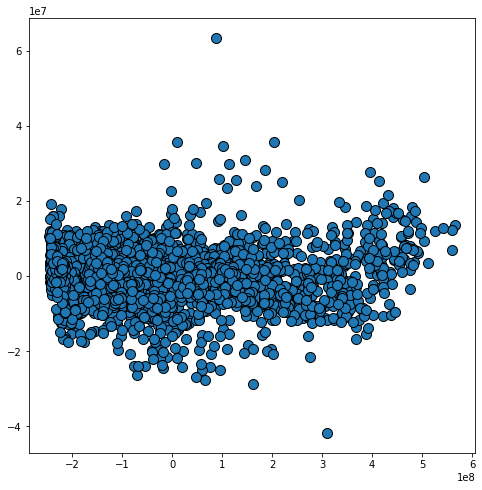

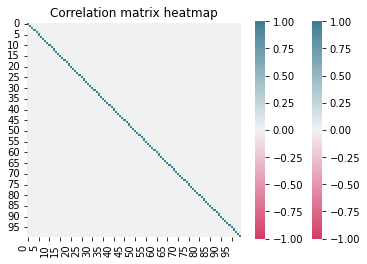

In [229]:
from sklearn.decomposition import PCA
import mglearn
import matplotlib.pyplot as plt

pca = PCA(n_components=100)
pca.fit(mat)
x_pca = pca.transform(mat)
print(x_pca.shape)
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 9])
plt.show()

mat = x_pca
import seaborn as sns
import pandas as pd

data = pd.DataFrame(mat)
corr = data.corr()
ax = sns.heatmap(corr,
        vmin= -1, vmax=1, center=0,
        cmap= sns.diverging_palette(0, 220, n=200),
        square= True)

import seaborn as sns
import pandas as pd

data = pd.DataFrame(mat)
corr = data.corr()
ax = sns.heatmap(corr,               #mat,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(0, 220, n=200),
        square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

plt.title("Correlation matrix heatmap")
plt.show()

In [275]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)

In [276]:
model.fit(mat_std)

/home/banikr2/miniconda3/envs/ims37/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


AffinityPropagation(damping=0.9)

In [281]:
yhat = model.predict(mat_std)
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

IndexError: index 121 is out of bounds for axis 0 with size 100

In [203]:
from sklearn.cluster import KMeans

In [213]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(mat)

KMeans(n_clusters=10, random_state=0)

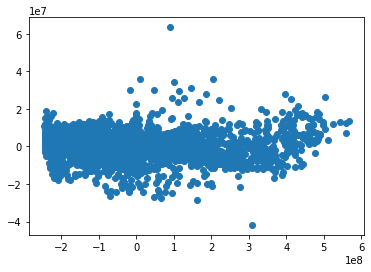

In [225]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)
X.shape
plt.scatter(mat[:,0], mat[:,9])
plt.show()

In [70]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=10, resize=0.7)
# image_shape = people.images[0].shape

In [74]:
people.images.shape, len(people.target_names)

((4324, 87, 65), 158)

In [122]:
print(hyImg.shape)
hyImg_data=hyImg.transpose(2,0,1).reshape(1494,-1)
print(hyImg_data.shape)

(84, 48, 1494)
(1494, 4032)


In [113]:
people.data.shape

(4324, 5655)

In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, random_state=0).fit(hyImg_data)

In [124]:
X_pca = pca.transform(hyImg_data)

In [ ]:
pca.

In [125]:
X_pca.shape

(1494, 100)

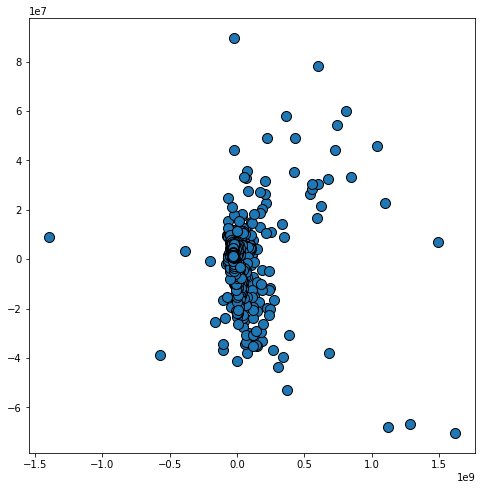

In [174]:
import mglearn
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 1], X_pca[:, 10])
plt.show()

In [152]:
np.arange(506, 2000, 1,)
bins = np.linspace(506,2000,num=1495, endpoint=True)

In [155]:
bins

array([ 506.,  507.,  508., ..., 1998., 1999., 2000.])

In [156]:
hist = np.histogram(spectrum[0], bins=bins)

In [161]:
hist

(array([ 1, 12, 70, ..., 27, 16,  2]),
 array([ 506.,  507.,  508., ..., 1998., 1999., 2000.]))

In [158]:
np.sum(hist[0]), len(spectrum[0])

(31769, 31769)

In [165]:
hist[0], np.shape(hist[0]), np.shape(hist[1])

(array([ 1, 12, 70, ..., 27, 16,  2]), (1494,), (1495,))

In [289]:
imze.get_region_range(1)
# for coord in outspectra:
#     print(coord)

((545, 628), (244, 291), (1, 1), 36755)

In [285]:
coord2spec=imze.get_region_spectra(1)

|##############################################################################################################################################################################################| 100% Time: 0:00:27


In [286]:
coord2spec

3142

Plotting images in different m/z channels

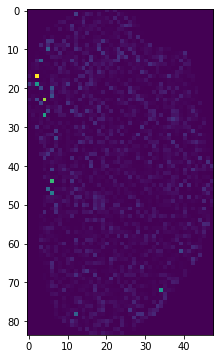

In [326]:
plt.imshow(region1[...,505])

In [322]:
region1.shape

(84, 48, 36755)

but 505 is not mzvalue. This is just index which starts at 0 and probably ends at 36755

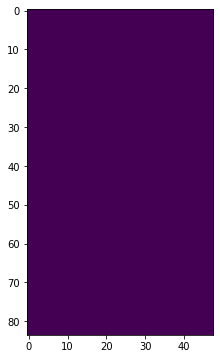

In [324]:
plt.imshow(region1[...,36754])

## How to plot images against different m/z values
- are unique m/z values same in all specIDs? 


``` python
len(np.unique(imze.parser.getspectrum(1)[0])),  \
len(np.unique(imze.parser.getspectrum(10)[0])), \
len(np.unique(imze.parser.getspectrum(10000)[0])), \
len(np.unique(imze.parser.getspectrum(19000)[0])), \
len(np.unique(imze.parser.getspectrum(19818)[0]))

>> (27240, 36755, 23331, 27176, 22426)

len(np.unique(imze.mzValues))

>> 29888
```

In [349]:
imze.parser.getspectrum(1)[0][12]

507.2339172363281

In [350]:
imze.parser.getspectrum(100)[0][12]

506.945068359375

In [351]:
len(np.unique(imze.mzValues))

29888

In [261]:
retDict = imze._coord2index()

`get_region_array`
- `get_region_range`
    - `coord2index`
    - `parser.mzlengths`
- `get_region_shape`
- `get_region_spectra`

In [289]:
imze.parser.get_physical_coordinates(20)

KeyError: 'Could not find all pixel size attributes in imzML file'

In [297]:
import matplotlib.pyplot as plt

In [302]:
# spectra1 = imze.get_region_array(1, makeNullLine=True)
# spectra1 = imze.normalize_region_array(spectra1, normalize="intra_median")
# spectra1 = imze.normalize_region_array(spectra1, normalize="inter_median")
spec = SpectraRegion(spectra1, imze.mzValues)

NameError: name 'spectra1' is not defined

In [298]:
plt.rcParams['figure.figsize'] = (10,6)
spec.vis_umap(legend=True)
plt.rcParams['figure.figsize'] = (6,4)

NameError: name 'spec' is not defined

In [296]:
imze.parser.getspectrum(1)[1]

array([    0.        ,     0.        , 13475.50390625, ...,
           0.        ,     0.        , 31814.42773438])

In [180]:
np.shape(imze.dregions[1])

(3142, 3)

In [228]:
len(imze.mzValues)

29888

1 ((545, 628, 244, 291), 3142)
2 ((695, 785, 244, 303), 3975)
3 ((704, 798, 146, 212), 4587)
4 ((848, 940, 201, 265), 4680)
5 ((988, 1071, 220, 273), 3435)


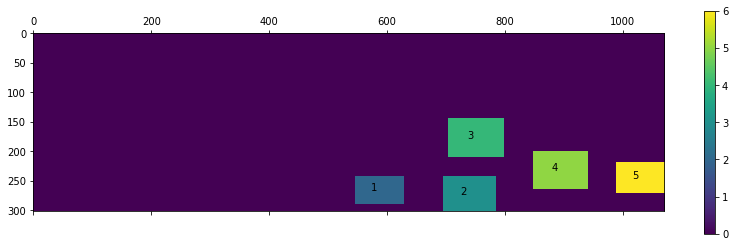

{1: ((545, 628, 244, 291), 3142),
 2: ((695, 785, 244, 303), 3975),
 3: ((704, 798, 146, 212), 4587),
 4: ((848, 940, 201, 265), 4680),
 5: ((988, 1071, 220, 273), 3435)}

In [155]:
imze.list_regions()

range of **m/z** value and how many value points:

In [149]:
min(imze.mzValues),max(imze.mzValues), len(imze.mzValues) # imze.mzValues[0], imze.mzValues[-1]

(1593.8713350673997, 23214.268851716733, 17100)

Start with processing the first region , region 1

```python
imze.fname, imze.specStart
('/media/banikr2/DATA/MALDI/demo_banikr_/210427-Chen_poslip.imzML', 0)
```

``` python
imze.get_region_range(2) # regionID = 2 or maybe 5
>> ((695, 785), (244, 303), (1, 1), 35431)

np.max(spectra1_orig1), np.min(spectra1_orig1)
>> (86995330.0, 0.0)
```
TIC image is the sum of abundance(ios/sec) by pixels/scans. 
``` python
region1 = imze.get_region_array(1, makeNullLine = True)
region1.shape # (84, 48, 36755)
imze.plot_tic(region1)
```
is same as: 

``` python
plt.imshow(np.sum(region1, axis=2))
plt.colorbar()
plt.show()
```
TNC image is np.linalg.norm image, which is normalized by squared abundance values, then summed over all m/z or channel axis and then square root. Not mean of abundances. 

not sure what `plot_fcs` does:

In [172]:
region1 = imze.get_region_array(1, makeNullLine = True)
region1.shape # (84, 48, 36755)

Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Found region 1 with shape (84, 48, 36755)
Found region 1 with shape (84, 48, 36755)
Found region 1 with shape (84, 48, 36755)
Found region 1 with shape (84, 48, 36755)
Found region 1 with shape (84, 48, 36755)
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:00
|##############################################################################################################################################################################################| 100% Time: 0:00:01


(84, 48, 36755)

Started Log Value: 5.555555617320351e-05
Started Log Value: 5.555555617320351e-05
Started Log Value: 5.555555617320351e-05
Pixel (42, 24): (17100, 4746, 0.0, 0.0, 0.0, 1.4999999672581912, 38.99999757710614)
Pixel (42, 24): (17100, 4746, 0.0, 0.0, 0.0, 1.4999999672581912, 38.99999757710614)
Pixel (42, 24): (17100, 4746, 0.0, 0.0, 0.0, 1.4999999672581912, 38.99999757710614)


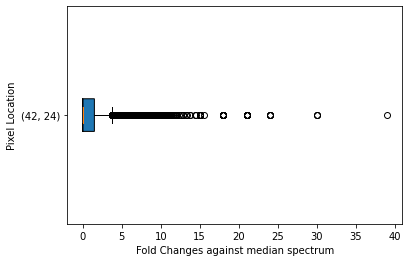

In [148]:
imze.plot_fcs(region1, [(42, 24)])

In [418]:
def get_spectrum(specid, normalize=False, withmz=False):
    spectra1 = imze.parser.getspectrum(specid)
    spectra = spectra1[1]

    if normalize:
        spectra = spectra / max(spectra)

    if withmz:
        return spectra1

    return spectra


def get_continuous_region_spectra(regionid):
    for coord in imze.dregions[regionid]:
        spectID = imze.coord2index.get(coord)

        if spectID == None or spectID < 0:
            print("Invalid coordinate", coord)
            continue

        cspec, cspec_mz = get_spectrum( spectID, withmz=True )

        outspectra[coord] = cspec
        outmzvalues[coord] = cspec_mz

    return outspectra, outmzvalues

In [419]:
oneSpec = get_spectrum(10, withmz=True) 

In [424]:
import pickle
FILEPATH_LOG = os.path.join(dataDir, 'OneSpec.bin')
with open(FILEPATH_LOG, 'wb') as pfile:
    pickle.dump(oneSpec, pfile)
    
# to read set the filepath as the location of the file(abspath)

with open(file, 'rb') as pfile:
    h = pickle.load(pfile)

In [422]:
plt.plot(oneSpec[0,:], oneSpec[1,:])

TypeError: tuple indices must be integers or slices, not tuple

In [421]:
print(np.shape(oneSpec))

(2, 36755)


In [416]:
region1.shape, \

(84, 48, 36755)

In [133]:
imze.list_highest_peaks(region1) #, True)

0 0 506.8382263183594
0 1 506.8382263183594
0 2 506.8382263183594
0 3 506.8382263183594
0 4 506.8382263183594
0 5 506.8382263183594
0 6 506.8382263183594
0 7 506.8382263183594
0 8 506.8382263183594
0 9 506.8382263183594
0 10 506.8382263183594
0 11 506.8382263183594
0 12 506.8382263183594
0 13 506.8382263183594
0 14 506.8382263183594
0 15 506.8382263183594
0 16 506.8382263183594
0 17 506.8382263183594
0 18 594.2529296875
0 19 549.5147705078125
0 20 570.2537841796875
0 21 599.92529296875
0 22 599.2900390625
0 23 506.8382263183594
0 24 506.8382263183594
0 25 506.8382263183594
0 26 506.8382263183594
0 27 506.8382263183594
0 28 506.8382263183594
0 29 506.8382263183594
0 30 506.8382263183594
0 31 506.8382263183594
0 32 506.8382263183594
0 33 506.8382263183594
0 34 506.8382263183594
0 35 506.8382263183594
0 36 506.8382263183594
0 37 506.8382263183594
0 38 506.8382263183594
0 39 506.8382263183594
0 40 506.8382263183594
0 41 506.8382263183594
0 42 506.8382263183594
0 43 506.8382263183594
0 44 5

10 24 658.0133666992188
10 25 667.8783569335938
10 26 717.1671142578125
10 27 674.3099975585938
10 28 690.2283325195312
10 29 643.6436157226562
10 30 622.3366088867188
10 31 602.2994384765625
10 32 635.355712890625
10 33 633.3492431640625
10 34 627.30224609375
10 35 693.2354125976562
10 36 678.2201538085938
10 37 506.8382263183594
10 38 506.8382263183594
10 39 506.8382263183594
10 40 506.8382263183594
10 41 506.8382263183594
10 42 506.8382263183594
10 43 506.8382263183594
10 44 506.8382263183594
10 45 506.8382263183594
10 46 506.8382263183594
10 47 506.8382263183594
11 0 506.8382263183594
11 1 506.8382263183594
11 2 584.2846069335938
11 3 581.2695922851562
11 4 633.269287109375
11 5 603.7205200195312
11 6 576.5008544921875
11 7 692.2349243164062
11 8 615.8048706054688
11 9 632.2717895507812
11 10 615.29443359375
11 11 623.3182983398438
11 12 712.0802001953125
11 13 594.9008178710938
11 14 633.06787109375
11 15 630.304931640625
11 16 618.2598876953125
11 17 599.5003051757812
11 18 652.2

IndexError: index 33839 is out of bounds for axis 0 with size 29888

In [137]:


# print(np.shape(imze.get_spectrum(0)))
print(np.shape(imze.get_spectrum(10)))
print(np.shape(imze.get_spectrum(100)))

(29888,)
(36755,)
(26847,)


In [138]:
imze.parser.getspectrum(0)

(array([ 506.83822632,  507.2281189 ,  507.22860718, ..., 1999.39587402,
        1999.97509766, 1999.98266602]),
 array([   0.        ,    0.        , 5711.53759766, ...,    0.        ,
           0.        ,    0.        ]))

In [25]:
for coord in imze.dregions[1]:
    spectID = imze.coord2index.get(coord, None)

In [29]:
imze.parser.mzLengths[spectID] - imze.specStart

24119

region shapes:
- x and y are in mm 
- what is this spectrum or the 3rd dimension?

In [7]:
for r in imze.dregions:
    print("x, y, #spectra: ", imze.get_region_shape(r))
#     print(r)

x, y, #spectra:  (84, 48, 36755)
x, y, #spectra:  (91, 60, 35431)
x, y, #spectra:  (95, 67, 36543)
x, y, #spectra:  (93, 65, 36996)
x, y, #spectra:  (84, 54, 35447)


Fetching region range
Fetching region shape
Found region 1 with shape (84, 48, 36755)
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:31
|##############################################################################################################################################################################################| 100% Time: 0:00:00
Started Log Value: 7833.04296875
|##############################################################################################################################################################################################| 100% Time: 0:00:01
Got 3128 median-enabled pixels
5-Number stats for medians: (4032, 3128, 0.0, 0.24915295664539733, 0.5206833809848972, 0.7041743643187981, 1.2954506973298734)
Started Log Value: 11995.843383789062
|########################

1


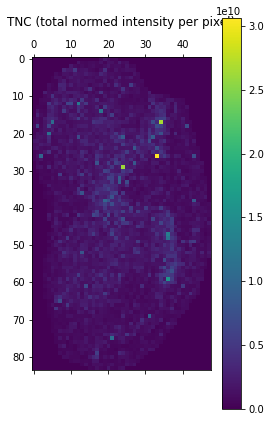

2


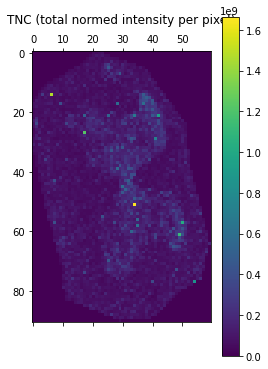

3


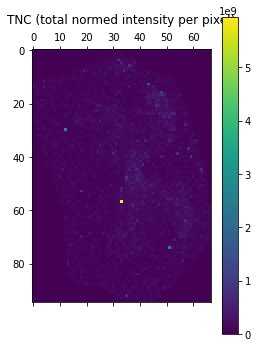

4


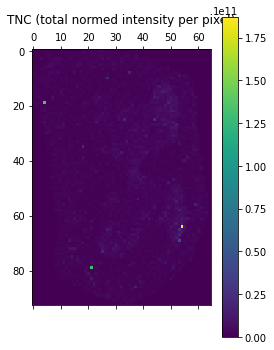

5


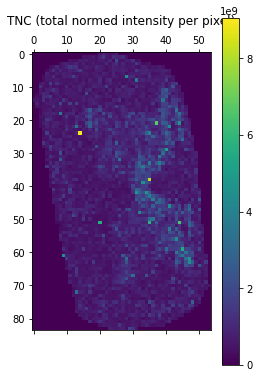

In [8]:
regionSpectra = {}
# checkRegions = [1,2,5,6,7]
checkRegions = [1,2,3,4,5]
for regionID in checkRegions:
    spectra_orig = imze.get_region_array(regionID, makeNullLine=True)
    spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
    spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")
    
    regionSpectra[regionID] = spectra

for regionID in checkRegions:
    print(regionID)
    imze.plot_tnc(regionSpectra[regionID])

Understanding the image regions:

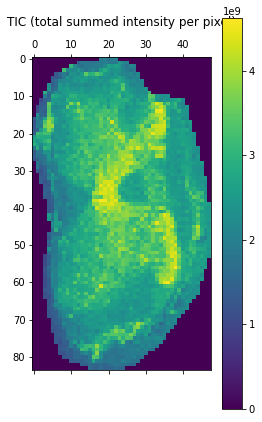

In [70]:
imze.plot_tic(region1)

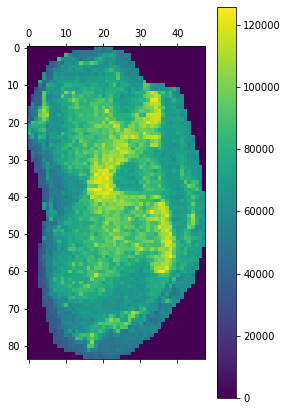

In [91]:
heatmap = plt.matshow(np.mean(region1, axis=2))
plt.colorbar(heatmap)
plt.show()

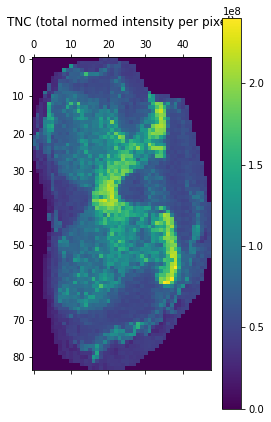

In [86]:
imze.plot_tnc(region1)

In [84]:
8e7, \
86995330.0

(80000000.0, 86995330.0)

In [140]:
from pIMZ.regions import SpectraRegion

In [141]:
spec = SpectraRegion(region1, imze.mzValues)

AssertionError: 

In [20]:
np.where(spectra1_orig==spectra1_orig.max())

(array([60]), array([35]), array([8393]))

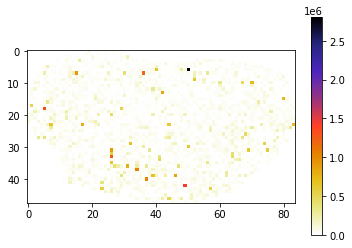

In [50]:
plt.imshow(region1[..., 3000].T, cmap='CMRmap_r')
plt.colorbar()
plt.show()

Fetching region range
Fetching region shape
Found region 2 with shape (91, 60, 35431)
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:00
|##############################################################################################################################################################################################| 100% Time: 0:00:00


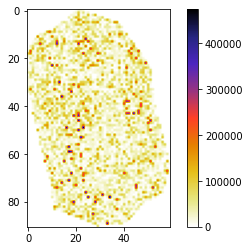

In [31]:
reg2 = imze.get_region_array(2)
reg2.shape
plt.imshow(reg2[...,100], cmap='CMRmap_r')
plt.colorbar()
plt.show()

In [22]:
spectra1_orig.max(), spectra1_orig.min()
# spectra1_intra = imze.normalize_region_array(spectra1_orig, normalize="intra_median")
# spectra1 = imze.normalize_region_array(spectra1_intra, normalize="inter_median")

(86995330.0, 0.0)

In [30]:
type(spectra1_orig), spectra1_orig.dtype

(numpy.ndarray, dtype('float32'))

In [88]:
imze.parser.mzLengths #==21000) # len --> 19819 ; min --> 17255 ; max --> 36996

[29888,
 27240,
 23975,
 27848,
 33107,
 35885,
 28001,
 33917,
 25667,
 29019,
 36755,
 29234,
 31769,
 22836,
 23062,
 28538,
 26778,
 21063,
 35216,
 28720,
 27172,
 25272,
 31198,
 27951,
 31210,
 25130,
 25706,
 28097,
 26217,
 29116,
 25569,
 29979,
 32116,
 27701,
 24485,
 30096,
 28321,
 26475,
 27007,
 29735,
 24515,
 25882,
 22054,
 26096,
 25792,
 20590,
 23587,
 29662,
 23968,
 26149,
 27986,
 25081,
 28027,
 26389,
 32040,
 26371,
 26957,
 31122,
 26205,
 25040,
 24667,
 28502,
 30722,
 28419,
 27148,
 29385,
 27555,
 24295,
 30241,
 24499,
 26708,
 26257,
 29619,
 28143,
 30750,
 27618,
 30606,
 27343,
 30074,
 33715,
 28963,
 32213,
 28820,
 26257,
 26503,
 29234,
 27333,
 24161,
 26307,
 29250,
 25397,
 33830,
 29971,
 27594,
 31875,
 32293,
 24671,
 22961,
 26073,
 23438,
 26847,
 28998,
 26228,
 25030,
 23811,
 22315,
 31227,
 20987,
 23279,
 24180,
 23903,
 29264,
 21767,
 32981,
 31167,
 26894,
 21771,
 32853,
 28638,
 33740,
 25701,
 21882,
 30305,
 24485,
 31571,


In [35]:
len(imze.parser.mzLengths)

19819

In [207]:
imze.get_region_spectra(1)

|##############################################################################################################################################################################################| 100% Time: 0:00:00


{(545,
  262,
  1): array([    0.        ,     0.        ,  2510.02075195, ...,
            0.        ,     0.        , 39653.22265625]),
 (545,
  263,
  1): array([    0.        ,     0.        , 17814.90234375, ...,
            0.        ,     0.        ,     0.        ]),
 (545,
  264,
  1): array([    0.        ,     0.        , 16432.56640625, ...,
            0.        ,     0.        ,     0.        ]),
 (545,
  265,
  1): array([    0.        ,     0.        , 13157.49414062, ...,
            0.        ,     0.        ,     0.        ]),
 (545,
  266,
  1): array([    0.        ,     0.        , 14121.90429688, ...,
            0.        ,     0.        ,     0.        ]),
 (546,
  256,
  1): array([    0.        ,     0.        , 10530.89746094, ...,
            0.        ,     0.        ,  6788.28222656]),
 (546,
  257,
  1): array([   0.        ,    0.        , 2058.88793945, ...,    0.        ,
           0.        ,    0.        ]),
 (546,
  258,
  1): array([   0.        

In [122]:
imze.parser.getspectrum(1)

(array([ 506.83822632,  507.22860718,  507.22909546, ..., 1998.14807129,
        1999.97509766, 1999.98266602]),
 array([    0.        ,     0.        , 13475.50390625, ...,
            0.        ,     0.        , 31814.42773438]))

In [133]:
np.shape(imze.parser.getspectrum(0)), np.shape(imze.parser.getspectrum(1)),   np.shape(imze.parser.getspectrum(2)), \
np.shape(imze.parser.getspectrum(3)), \
np.shape(imze.parser.getspectrum(4)), \


((2, 29888), (2, 27240), (2, 23975), (2, 27848), (2, 33107))

m/z should be plotted on X axis

``` python
spec = 10401 # 
j = np.array(imze.parser.getspectrum(spec))
np.shape(j)
fig, ax1 = plt.subplots(figsize=(12, 12), dpi=100)
# ax1.set_xlim(1, 1140)
ax2 = ax1.twinx()
ax2.set_ylabel('Abundance values', fontsize=20)
ax2.plot(j[1,:], linewidth=2.0, label='ions/sec', color='tab:brown') # '-o', 
ax2.legend(loc='lower right', bbox_to_anchor=(0.8, 0.9), fontsize=20)
# ax2.tick_params(axis='x', labelcolor='tab:brown')
# ax2.set_xlim(0, 9)
ax1.set_xlabel('?', fontsize=20)
ax1.set_ylabel('m/z values', fontsize=20)
ax1.plot(j[0,:], linewidth=2.0, label='m/z', color='tab:cyan') # ,
ax1.tick_params(axis='x') #, labelcolor='tab:black',)
# ax1.tick_params(axis='y', labelsize='large')
ax1.legend(loc='lower right', bbox_to_anchor=(0.8, 0.85), fontsize=20)
plt.setp(ax1.get_yticklabels(), fontsize=15)
plt.setp(ax1.get_xticklabels(), fontsize=15)
plt.setp(ax2.get_yticklabels(), fontsize=15)
ax1.set_title("Spectrum: {} of 19819".format(spec), y=1.0, pad=20, fontsize=20)
plt.show()
```

In [55]:
j020 = np.array(imze.parser.getspectrum(0))
np.shape(j020)

(2, 29279)

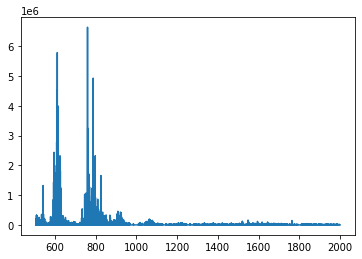

In [57]:
plt.plot(j020[0,:],j020[1, :])
plt.show()

In [69]:
j021 = np.array(imze.parser.getspectrum(30000))
plt.plot(j021[0,:], j021[1,:])

IndexError: list index out of range

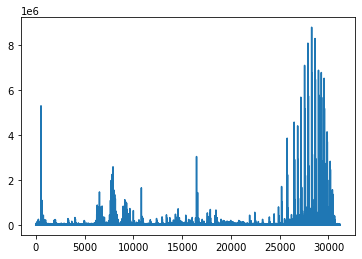

In [73]:
j022 = np.array(imze.parser.getspectrum(22))
plt.plot(j022[1,:])

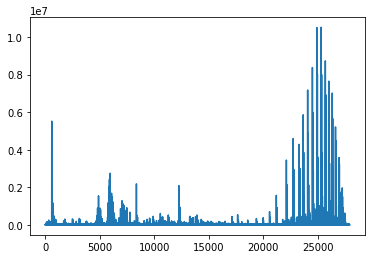

In [74]:
j023 = np.array(imze.parser.getspectrum(23))
plt.plot(j023[1,:])

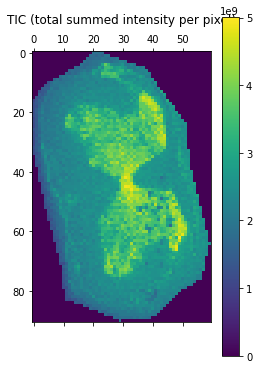

In [100]:
imze.plot_tic(reg2)

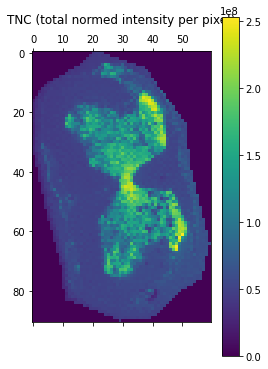

In [101]:
imze.plot_tnc(reg2)

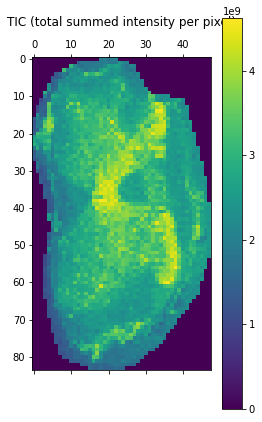

In [102]:
imze.plot_tic(spectra1_orig)

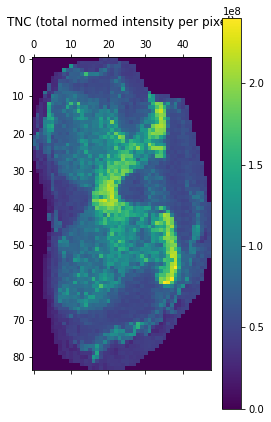

In [103]:
imze.plot_tnc(spectra1_orig)

Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Found region 1 with shape (84, 48, 36755)
Found region 1 with shape (84, 48, 36755)
Found region 1 with shape (84, 48, 36755)
Found region 1 with shape (84, 48, 36755)
Found region 1 with shape (84, 48, 36755)
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:00
|##############################################################################################################################################################################################| 100% Time: 0:00:00


Here (84, 48, 36755)
(36755,)
506.8382263183594 1999.982666015625
506.75 2000.0
(84, 48, 5974)
(5974,)


|##############################################################################################################################################################################################| 100% Time: 0:00:37


Identified peaks for 2617 of 5974 fields
Returning Peaks
(84, 48) <<< Image shape


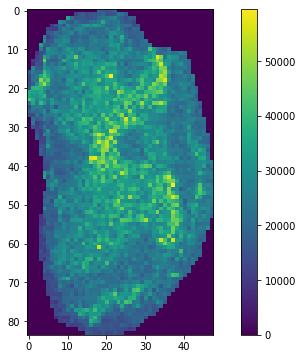

Ends


In [373]:
region1 = imze.get_region_array(1)
print("Here", np.shape(region1))  # (36755,)
masses = imze.parser.getspectrum(10)[0]
print(np.shape(masses))
peakarray, peakmasses = imze.to_called_peaks(region1, masses, resolution=4)
peakimg = np.mean(peakarray, axis=2)
print(peakimg.shape, "<<< Image shape")
plt.imshow(peakimg)
plt.colorbar()
plt.show()
print("Ends")

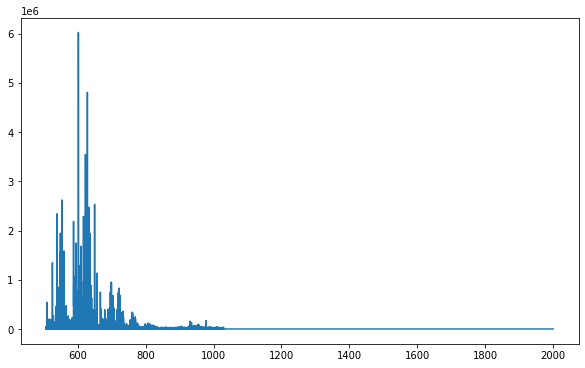

In [374]:
plt.plot(peakmasses, peakarray[10, 20, :])

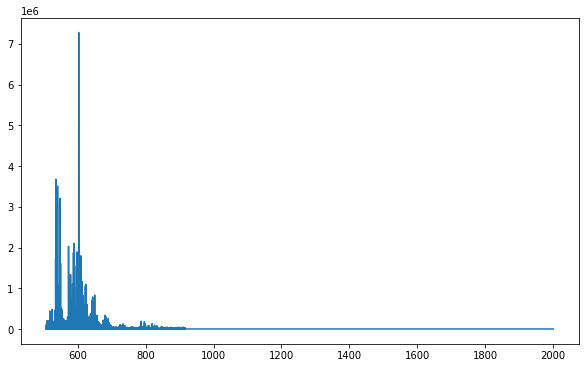

In [375]:
plt.plot(peakmasses, peakarray[11, 20, :])

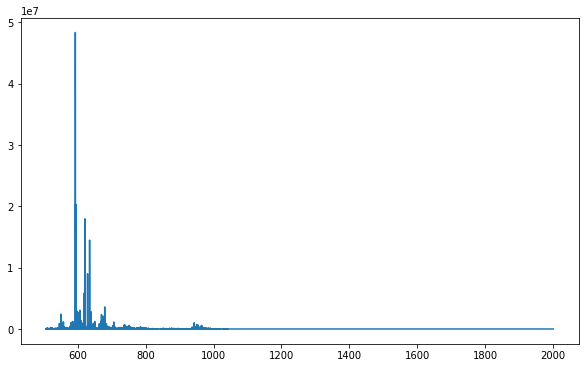

In [376]:
plt.plot(peakmasses, peakarray[20, 20, :])

In [4]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()

In [6]:
cancer.data.shape, \
cancer.target.shape, \
len(cancer.feature_names), \
np.max(cancer.data), np.min(cancer.data)

((569, 30), (569,), 30, 4254.0, 0.0)

In [385]:
spec = SpectraRegion(peakarray, peakmasses)
spec.calculate_similarity(mode="spectra_log")

2021-10-15 00:00:56,227  SpectraRegion  INFO: dimensions inputarray: 5974
2021-10-15 00:00:56,229  SpectraRegion  INFO: Creating C++ obj
2021-10-15 00:00:56,230  SpectraRegion  INFO: 5974 (84, 48, 5974)
2021-10-15 00:00:56,231  SpectraRegion  INFO: dimensions 5974
2021-10-15 00:00:56,232  SpectraRegion  INFO: input dimensions (84, 48, 5974)
2021-10-15 00:00:56,233  SpectraRegion  INFO: Switching to dot mode
2021-10-15 00:00:56,260  SpectraRegion  INFO: Starting calc similarity c++
Element count 4032


SRM C++ Object here with 5974 dimensions and 0 Qs
img i=0 img i=0 img i=0 img i=0 img i=0 img i=0 img i=0 img i=0 img i=0 img i=0 
Within for-loop: OMP THREADS=16


2021-10-15 00:01:03,787  SpectraRegion  INFO: outclust dimensions (4032, 4032)
2021-10-15 00:01:03,789  SpectraRegion  INFO: Calculating spectra similarity
2021-10-15 00:01:03,834  SpectraRegion  INFO: Calculating spectra similarity done


i=1 i=1 i=1 i=1 i=1 i=1 i=1 i=1 i=1 i=1 
Finished processing. Created matrix with 16257024 Fields.


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [386]:
spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=3000)

2021-10-15 00:01:42,825  SpectraRegion  INFO: Calculating clusters
2021-10-15 00:01:42,892  SpectraRegion  INFO: UMAP reduction


Elem Matrix (4032, 5974)


AttributeError: module 'umap' has no attribute 'UMAP'

In [384]:
spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=10, num_samples=3000)
plt.rcParams['figure.figsize'] = (10,6)
spec.vis_umap(legend=True)
plt.rcParams['figure.figsize'] = (6,4)

2021-10-14 23:59:45,161  SpectraRegion  INFO: HDBSCAN reduction


AttributeError: 'NoneType' object has no attribute 'shape'

In [104]:
reg2.shape

(91, 60, 35431)

In [105]:
reg2_mean = np.mean(reg2,axis=2)

In [106]:
reg2_mean.shape

(91, 60)

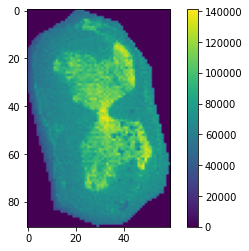

In [109]:
plt.imshow(reg2_mean)
plt.colorbar()
plt.show()

In [110]:
reg2_max = np.max(reg2, axis=2)
reg2_max.shape

(91, 60)

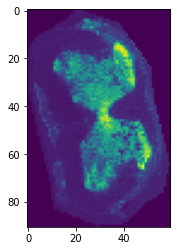

In [111]:
plt.imshow(reg2_max)

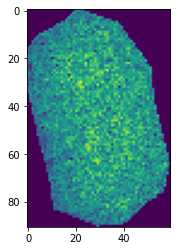

In [114]:
reg2_med = np.median(reg2, axis=2)
plt.imshow(reg2_med)

In [115]:
plt.rcParams['figure.figsize'] = (10,6)

In [117]:
from pIMZ.regions import SpectraRegion
spec = SpectraRegion(spectra1_orig, imze.mzValues)

AssertionError: 

### MSiReader: 
A rectangular ROI was selected which covers region 3. Two m/z were selected to generate the spectrum. Both had `parabolic centroid` algorithm selected and had 50 MS peak as threshold(purple marker). 

In [136]:
# <!-- |<p>   |  <p> |
# |:-:|:-:|
# |![](../Images/mz_627_50_peaks.png)  |  ![](../Images/mz_1516_50_peak.png) | 
# | a. Spectrum at 627.50 m/z | b. Spectrum at 1516.098 m/z| -->

|<p>   |  <p> | <p> |
|:-:|:-:|:-:|
|![](../Images/reg4_spec.png)  |  ![](../Images/reg2_spec.png) | ![](../Images/allreg_spec.png) |
| a. region/section 4 spectrum | b. region/section 2 spectrum| c. all region spectrum |

### References:
1. http://www.premierbiosoft.com/maldi-tissue-imaging/index.html <br>
2. [imzML — A common data format for the flexible exchange and processing of mass spectrometry imaging data.](https://www.sciencedirect.com/science/article/pii/S1874391912005568?via%3Dihub) <br>
3. [Mass Spectrometry Imaging and Integration with Other Imaging Modalities for Greater Molecular Understanding of Biological Tissues.](https://pubmed.ncbi.nlm.nih.gov/30167993/) <br>
4. [Unsupervised machine learning for exploratory data analysis in imaging mass spectrometry.](https://pubmed.ncbi.nlm.nih.gov/31602691/) <br>
5. [Deep learning for tumor classification in imaging mass spectrometry.](https://academic.oup.com/bioinformatics/article/34/7/1215/4604594)
6. [MSiReader v1.0: Evolving Open-Source Mass Spectrometry Imaging Software for Targeted and Untargeted Analyses.](https://pubmed.ncbi.nlm.nih.gov/28932998/) <br>
7. [Novel application of automated machine learning with MALDI-TOF-MS for rapid high-throughput screening of COVID-19: a proof of concept.](https://www.nature.com/articles/s41598-021-87463-w)<br>
8. [Toward nanoscale molecular mass spectrometry imaging via physically constrained machine learning on co-registered multimodal data.](https://www.nature.com/articles/s41524-020-00357-9) <br>
9. [Introduction to mass spectrometry data analysis.](https://www.aspect-analytics.com/media/blog/2020-05-30-introduction-to-mass-spectrometry-data-analysis/)

### Tools / libraries: 
1. [spectrum_utils](https://spectrum-utils.readthedocs.io/en/latest/quickstart.html) <br>
2. [pyteomics](https://pyteomics.readthedocs.io/en/latest/) <br>
3. [pymzML](https://pymzml.readthedocs.io/en/latest/intro.html#implementation) <br>
4. [MSiReader](https://msireader.wordpress.ncsu.edu/) <br>
5. [pIMZ](https://github.com/mjoppich/pIMZ) <br>

### Questions: 
- what are these parameters? 
<img src="../Images/what_imzML_spots_spacing_line.png" alt="Drawing" style="width:500px;"/>

Spots per line: there are 1071 columns in per row/line <br>
Number of lines: #303 rows <br>

In [134]:
1071*303

324513

In [154]:
from scipy.io import loadmat
# import h5py
import mat73

In [156]:
# spinemat = loadmat(os.path.join(dataDir, 'demo_chen_pos_lip.mat'))
spinemat = mat73.loadmat(os.path.join(dataDir, 'demo_chen_pos_lip.mat'))
# with h5py.File(os.path.join(dataDir, 'demo_chen_pos_lip.mat'), 'r') as f:
#     f.keys()

KeyboardInterrupt: 

In [359]:
84*48


4032

In [366]:
len(imze.parser.coordinates)

19819

In [367]:
imze.dregions[1][2]

(545, 264, 1)

In [370]:
imze.coord2index(str(imze.dregions[1][2]))

TypeError: 'dict' object is not callable